In [4]:
#WORKING CELL

import matplotlib.pyplot as plt
import numpy as np

f=open( 'lab0_spectral_data.txt', "r")
lines=f.readlines()[1:]
#print(lines)

Am241=[] # 59.54 keV
Ba133=[] # 80.997 keV (34%) 302.853 keV (18%) 356.017 keV (62%)
Cs137=[] # 661.66 keV
Co60=[] # 1173.2 keV and 1332.51 keV
Eu152=[] # 344.28 keV (27%) 1112.1 keV (14%) 1408.1 keV (21%) 121.78 keV (26%)



for x in lines:
    x.split('\t')
    y=[int(s) for s in x.split() if s.isdigit()]
    Am241.append(y[0])
    Ba133.append(y[1])
    Cs137.append(y[2])
    Co60.append(y[3])
    Eu152.append(y[4])

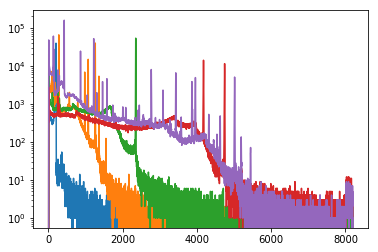

In [31]:
## DATA PARSER ## (using already downloaded data :\

import matplotlib.pyplot as plt
import numpy as np

f=open( 'lab0_spectral_data.txt', "r")
lines=f.readlines()[1:]


Am241=[] # 59.54 keV
Ba133=[] # 80.997 keV (34%) 302.853 keV (18%) 356.017 keV (62%)
Cs137=[] # 661.66 keV
Co60=[] # 1173.2 keV and 1332.51 keV
Eu152=[] # 344.28 keV (27%) 1112.1 keV (14%) 1408.1 keV (21%) 121.78 keV (26%)



for x in lines:
    x.split('\t')
    y=[int(s) for s in x.split() if s.isdigit()]
    Am241.append(y[0])
    Ba133.append(y[1])
    Cs137.append(y[2])
    Co60.append(y[3])
    Eu152.append(y[4])
# testing that input vectors have the same length
f.close()


len(Cs137)==len(Am241)==len(Cs137)==len(Co60)==len(Eu152)==8192
chan=list(range(1,len(Cs137)+1)) #number of channels:8192
#sources=[ for i in chan Am241[i]+Ba133[i]+Cs137[i]+Co60[i]+Eu152[i]]


#plt.semilogy(chan,Cs137)

plt.semilogy(chan, Am241,chan, Ba133,chan, Cs137, chan,Co60, chan, Eu152)
plt.show()


0.28057600186393294 1.1810916123019481


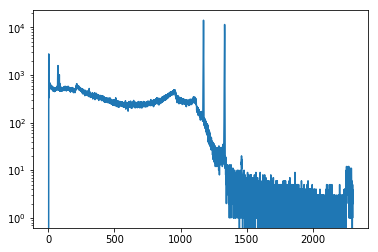

In [30]:
## Energy Calibration ##

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def gaus(x,a,b,c):
  return a*np.exp( -(x-b)**2/(2*c**2))

#plt.semilogy(chan, Cs137)
#plt.show()

small=15 # 20 chan width of Cs 137, 10 chan width of Am 241


centroid_Cs=np.argmax(Cs137) # 661.66 keV
centroid_Am=np.argmax(Am241) # 59.54 keV

x1=centroid_Am
x2=centroid_Cs

y1=59.5409
y2=661.657 

energies=[]
m=float(y2-y1)/(x2-x1)
b=float(-m*x1+y1)
print(m,b)

chan_array=np.array(chan)

for i in chan:
    energies.append(np.multiply(m, chan_array[i-1])+b)
                                      

plt.semilogy(energies, Co60)
plt.show()



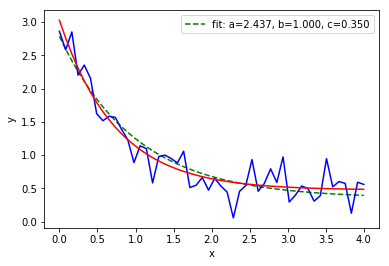

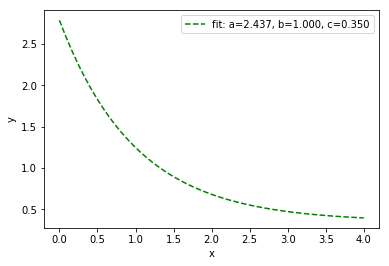

In [16]:
## Example from Online

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c



xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.show()

#Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()